In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as ss
from scipy import stats
import matplotlib.pyplot as plt
import sys

In [2]:
path = '../statistics/'
sys.path.insert(0, path)
import stat_functions as stat_funct

In [3]:
# We can use sample GAMA data
gama_path = '../../OBSERVATIONS/GAMA/GAMA_Galaxies/GAMA_sample.csv'
gama = pd.read_csv(gama_path)
gama

,CATAID,RA,DEC,Z,nQ,logmstar,dellogmstar,logage,dellogage,metal,delmetal,DistanceTo5nn,SurfaceDensity,SurfaceDensityErr
0,14505,211.88896,0.83437,0.10576,4,10.35820,0.108069,9.82304,0.193559,0.011483,0.008675,2.918,0.187,0.0129
1,14506,211.90117,0.72891,0.16509,4,10.68080,0.097580,9.83731,0.161593,0.012054,0.007652,1.736,0.561,0.0127
2,14517,211.88746,0.63093,0.11350,5,10.60020,0.109343,9.79827,0.202792,0.009935,0.007040,2.509,0.269,0.0061
3,14518,211.89292,0.68086,0.17236,4,9.68806,0.115392,9.47707,0.256020,0.011812,0.007421,2.113,0.379,0.0090
4,14519,211.89233,0.67899,0.17253,4,10.14390,0.109480,9.78456,0.198583,0.010978,0.007457,2.090,0.387,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20911,3157989,217.26279,2.85312,0.13856,4,9.27893,0.131946,9.57333,0.257999,0.010764,0.008359,0.881,2.052,0.1057
20912,3277603,213.49808,2.22350,0.16975,4,9.38690,0.155558,9.49979,0.295441,0.010669,0.009034,1.142,1.220,0.0936
20913,3279847,215.40962,2.16504,0.11119,4,9.70975,0.124740,9.80607,0.205594,0.011843,0.009228,3.182,0.157,0.0142
20914,3282877,218.18392,2.25756,0.11310,4,9.17488,0.137932,9.64837,0.258143,0.009871,0.008107,1.704,0.548,0.0442


Text(0, 0.5, 'Age')

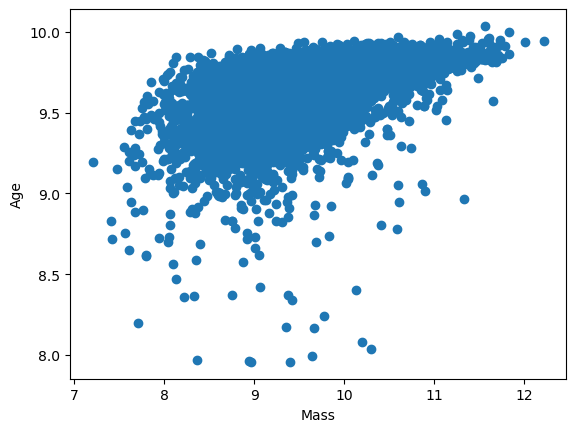

In [4]:
plt.scatter(gama['logmstar'], gama['logage'])
plt.xlabel('Mass') ; plt.ylabel('Age')

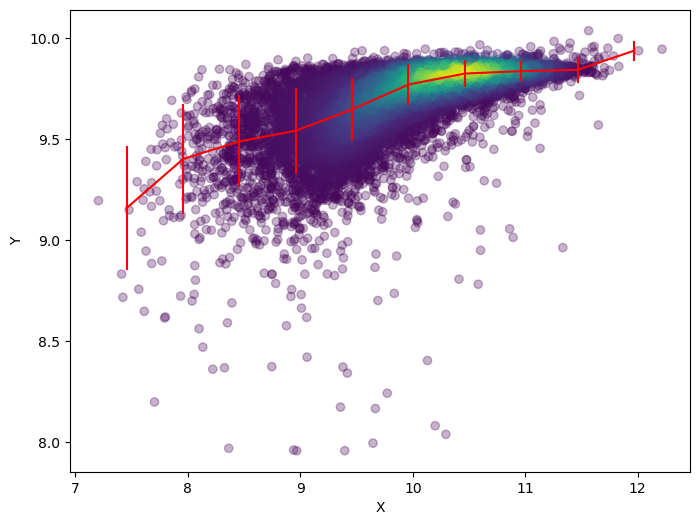

In [5]:
# Bin the data and fit a line to show correlation using medians
stat_funct.plot_binned_data(gama['logmstar'], gama['logage'])

In [6]:
# To find the residuals and remove/decouple X parameter from Y: 
delta_age, y_exp, res = stat_funct.residuals(gama['logmstar'], gama['logage'])

Text(0, 0.5, '$\\Delta$ Age')

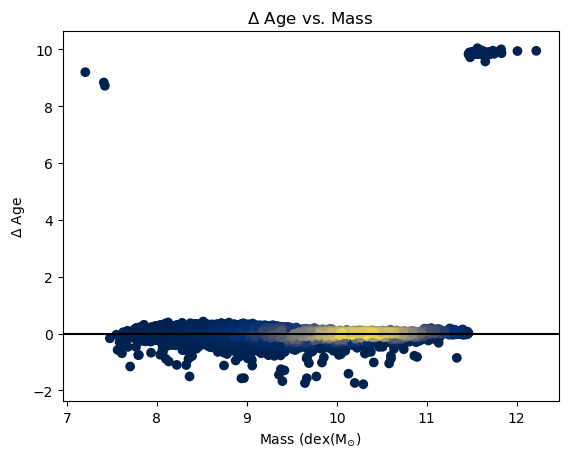

In [7]:
# Plot new relationship
x = gama['logmstar']
y = delta_age

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

plt.scatter(x, y, c = z, cmap = 'cividis')
plt.axhline(color="black")
plt.title('$\Delta$ Age vs. Mass') ; plt.xlabel("Mass (dex(M$_{\odot}$)") ; plt.ylabel("$\Delta$ Age")

In [10]:
help(stat_funct.residuals_masked)

Help on function residuals_masked in module stat_functions:

residuals_masked(x, y, num_bins=None)
    Takes a parameter in and decouples mass from it, returning the Delta Parameter. 
    Treats the delta parameter outliers using standard dev. of 4 and higher and masking.
    x and y must be numpy arrays.



In [8]:
# Our conversion has done some weird calculation error / transformation, so we mask instead 
delta_age, y_exp, res, X, dmask  = stat_funct.residuals_masked(gama['logmstar'], gama['logage'], 40) # all parameters returned are masked already

Text(0, 0.5, '$\\Delta$ Age')

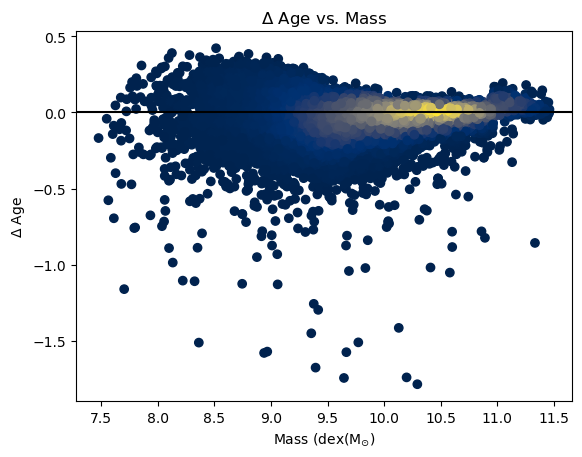

In [9]:
# With mask
x = X         # our "X" parameter (logmstar) masked
y = delta_age # already masked

xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

plt.scatter(x, y, c = z, cmap = 'cividis')
plt.axhline(color="black")
plt.title('$\Delta$ Age vs. Mass') ; plt.xlabel("Mass (dex(M$_{\odot}$)") ; plt.ylabel("$\Delta$ Age")